## 目录

- [Packages](#0)
- [1 模型的J × K 折交叉验证](#1)
- [2 获取特征重要性](#2)
    - [2.1 基于Gini不纯度（feature_importances_）的特征重要性](#2-1)
    - [2.2 基于排列（permutation_importance）的特征重要性](#2-2)
- [3 重要特征的分析](#3)
    - [3.1 事故参与人员数](#3-1)
    - [3.2 行人年龄段](#3-2)
    - [3.3 事故发生时间](#3-3)
    - [3.4 道路最高允许车速](#3-4)
- [4 特征的卡方检验](#4) 
    - [4.1 事故参与人员数](#4-1)
    - [4.2 行人年龄段](#4-2)
    - [4.3 事故发生时间](#4-3)
    - [4.4 道路最高允许车速](#4-4)

<a name='0'></a>
# Packages
Run the following cell to load the packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
from scipy import stats
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [2]:
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei'] 
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_excel("数据集.xlsx")   

<img src="X&Y.png" style="width:600px;height:800;">

In [4]:
data.head()

,事故发生时间,行人责任,天气,降水情况,雾时能见度,事故车辆数,事故涉及方总数,事故参与人员数,参与车辆类型,碰撞前车辆运动方向,...,碰撞时行人速度,道路最高允许车速,道路两侧路面,碰撞位置,道路特征,路面情况,道路线性,交通控制,道路类型,行人事故后果
0,10,2,2,2,1,1,2,2,1,2,...,4,7,5,3,1,1,2,1,10,1
1,8,4,2,2,1,1,2,2,1,2,...,4,11,2,3,5,1,5,3,9,1
2,5,2,2,2,1,1,2,4,1,2,...,6,9,1,3,1,1,1,1,14,1
3,12,1,4,3,1,1,2,3,1,2,...,4,11,2,3,1,2,1,1,1,1
4,7,2,2,2,1,1,2,2,1,2,...,4,9,2,3,2,1,1,2,10,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   事故发生时间     1422 non-null   int64
 1   行人责任       1422 non-null   int64
 2   天气         1422 non-null   int64
 3   降水情况       1422 non-null   int64
 4   雾时能见度      1422 non-null   int64
 5   事故车辆数      1422 non-null   int64
 6   事故涉及方总数    1422 non-null   int64
 7   事故参与人员数    1422 non-null   int64
 8   参与车辆类型     1422 non-null   int64
 9   碰撞前车辆运动方向  1422 non-null   int64
 10  行人年龄段      1422 non-null   int64
 11  性别         1422 non-null   int64
 12  碰撞时行人速度    1422 non-null   int64
 13  道路最高允许车速   1422 non-null   int64
 14  道路两侧路面     1422 non-null   int64
 15  碰撞位置       1422 non-null   int64
 16  道路特征       1422 non-null   int64
 17  路面情况       1422 non-null   int64
 18  道路线性       1422 non-null   int64
 19  交通控制       1422 non-null   int64
 20  道路类型       1422 non-null   int64
 21  行人事故后果     142

<a name='1'></a>
# 1 模型的J × K 折交叉验证

all_scores：每一次打乱数据集顺序的交叉验证的AUC分数，每次返回5个分数。共有50个分数。
                           
all_means：每一次打乱数据集顺序的交叉验证的5次AUC得分的均值，每次返回1个分数。共有10个分数。

In [6]:
rf = RandomForestClassifier()
all_scores = []
all_means = []

for i in range(10):
    data = shuffle(data)    
    scores = cross_val_score(rf, X = data.loc[:,'事故发生时间':'道路类型'], y = data['行人事故后果'], cv=5, scoring='roc_auc')
    mean = scores.mean()
    all_scores.append(scores)
    all_means.append(mean)

In [7]:
sum(all_means) / 10    # 所有AUC的均值，即all_means的均值

0.761629389896134

<a name='2'></a>
# 2 获取特征重要性

In [8]:
X = data.loc[:, '事故发生时间':'道路类型']
y = data['行人事故后果']
X.shape, y.shape

((1422, 21), (1422,))

<a name='2-1'></a>
2.1 基于Gini不纯度（feature_importances_）的特征重要性

In [9]:
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X, y)
y_pred = rf1.predict(X) 

In [10]:
importances = rf1.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
good = sorted(importances, reverse=True)
good = [i * 100 for i in good]    #化为百分号表示

In [11]:
c = {"特征" : names,
   "特征重要度（%）" : good} 
fea_imp = pd.DataFrame(c) 
fea_imp = fea_imp.sort_values(by=['特征'],ascending=False)

In [12]:
fea_imp 

,特征,特征重要度（%）
20,雾时能见度,0.421161
19,降水情况,1.104988
11,道路线性,3.148216
2,道路类型,10.369324
5,道路特征,5.785506
3,道路最高允许车速,9.299354
4,道路两侧路面,6.632610
13,路面情况,3.084570
9,行人责任,5.085575
0,行人年龄段,11.399160


<a name='2-2'></a>
2.2 基于排列（permutation_importance）的特征重要性

In [13]:
results = []
clf = RandomForestClassifier()

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf.fit(X_train, y_train)
    result = permutation_importance(clf, X_test, y_test, n_repeats=10) 
    results.append(result.importances_mean)

In [14]:
result  = np.zeros(21,)
for i in range(100):
    result +=  results[i]
result = result / 100    

In [15]:
indices1 = np.argsort(result)[::-1]
names1 = [X.columns.values[i] for i in indices1]
good1 = sorted(result, reverse=True)
good1 = [i * 100 for i in good1] 

In [16]:
d = {"特征" : names1,
   "特征重要度（%）1" : good1} 
fea_imp1 = pd.DataFrame(d) 
fea_imp1 = fea_imp1.sort_values(by=['特征'],ascending=False)

In [17]:
fea_imp1

,特征,特征重要度（%）1
19,雾时能见度,0.031579
20,降水情况,-0.125614
4,道路线性,1.356491
5,道路类型,1.260702
9,道路特征,0.344912
3,道路最高允许车速,1.821754
10,道路两侧路面,0.228421
11,路面情况,0.228070
8,行人责任,0.356491
1,行人年龄段,2.335789


In [18]:
hhh = pd.merge(fea_imp, fea_imp1, on='特征')

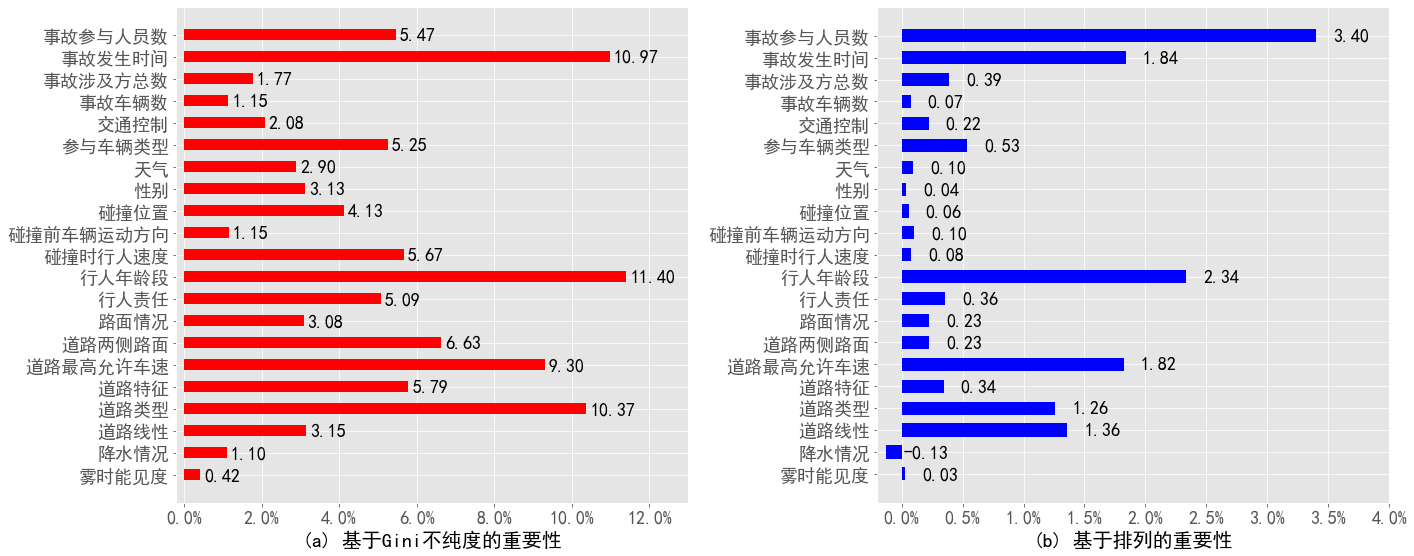

In [19]:
fig, ax = plt.subplots(1,2,figsize = (20,8))

def to_percent(temp, position):
    return '%1.1f'%(1*temp) + '%'

#feature_importances
ax[0].barh(hhh["特征"], hhh["特征重要度（%）"],height = 0.5, color='r')  
for a,b in zip(list(hhh["特征"]),list(hhh["特征重要度（%）"])):   
    ax[0].text(b+0.1, a,'%.2f'%b, ha = 'left',va = 'center',fontsize=18)

ax[0].set_title('(a) 基于Gini不纯度的重要性',fontsize=20, y=-0.1)
ax[0].tick_params(labelsize=18)
ax[0].set_xlim([-0.2,13])
ax[0].xaxis.set_major_formatter(FuncFormatter(to_percent))


#permutation_importance
ax[1].barh(hhh["特征"], hhh["特征重要度（%）1"],height = 0.6, color='b')  
for a,b in zip(list(hhh["特征"]),list(hhh["特征重要度（%）1"])):   
    ax[1].text(b+0.14, a,'%.2f'%b, ha = 'left',va = 'center',fontsize=18)

ax[1].set_title('(b) 基于排列的重要性',fontsize=20, y=-0.1)
ax[1].tick_params(labelsize=18)
ax[1].set_xlim([-0.2,4])
ax[1].xaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tight_layout(pad=2)     #避免过于拥挤
plt.show()    

fig.savefig('特征重要度图.svg',format='svg',dpi=600, bbox_inches='tight')

<a name='3'></a>
# 3 重要特征的分析

下面所有表格的行人事故后果属性表示的含义是：行人发生死亡或重伤的占比

<a name='3-1'></a>
3.1 事故参与人员数

In [20]:
map = {'事故参与人员数':data["事故参与人员数"].value_counts().index,'次数':data["事故参与人员数"].value_counts().values}
df = pd.DataFrame(map)
df = df.sort_values(by=['事故参与人员数'],ascending=True)
c = data[["事故参与人员数", "行人事故后果"]].groupby(['事故参与人员数'], as_index=True).sum().sort_values(by='行人事故后果', ascending=False)
c = c.sort_values(by=['事故参与人员数'],ascending=True)
d3 = pd.merge(c, df,on = '事故参与人员数')
d31 = d3[:4]
d31.loc['5'] =  ['>5', d3[4:]["行人事故后果"].sum(), d3[4:]["次数"].sum()]
d31.rename(columns={'次数':'次数占比', '行人事故后果':'死亡或重伤占比' },inplace=True) 
d31["死亡或重伤占比"] = d31["死亡或重伤占比"] / d31["次数占比"] * 100
d31["次数占比"] = d31["次数占比"] / len(data) * 100
mapping = {2:'2人', 3:'3人', 4:'4人', 5:'5人', ">5":'>5人', }
d31["事故参与人员数"].replace((mapping),inplace=True)
d31

,事故参与人员数,死亡或重伤占比,次数占比
0,2人,51.987448,67.229255
1,3人,68.339768,18.213783
2,4人,81.818182,6.188467
3,5人,77.049180,4.289733
5,>5人,84.482759,4.078762


<a name='3-2'></a>
3.2 行人年龄段

In [21]:
map = {'行人年龄段':data["行人年龄段"].value_counts().index,'次数':data["行人年龄段"].value_counts().values}
df = pd.DataFrame(map)
c = data[["行人年龄段", "行人事故后果"]].groupby(['行人年龄段'], as_index=True).mean().sort_values(by='行人事故后果', ascending=False)
d32 = pd.merge(c, df,on = '行人年龄段')
d32["次数"] = d32["次数"] / len(data) * 100
d32 = d32.sort_values(by=['行人年龄段'],ascending=True)
mapping = {1:'<6 岁', 2:'6-12 岁', 3:'13-17 岁', 4:'18-30 岁', 5:'31-40 岁', 6:'41-50 岁', 7:'51-60 岁', 
            8:'61-70 岁', 9:'>70 岁', 10:'未知'}
d32["行人年龄段"].replace((mapping),inplace=True)
d32["行人事故后果"] = d32["行人事故后果"] * 100
d32.rename(columns={'次数':'次数占比', '行人事故后果':'死亡或重伤占比' },inplace=True) 
d32

,行人年龄段,死亡或重伤占比,次数占比
6,<6 岁,55.384615,4.571027
8,6-12 岁,32.812500,4.500703
9,13-17 岁,26.086957,1.617440
7,18-30 岁,47.402597,10.829817
5,31-40 岁,55.900621,11.322082
4,41-50 岁,58.995816,16.807314
2,51-60 岁,64.782609,16.174402
3,61-70 岁,61.926606,15.330520
0,>70 岁,72.682927,14.416315
1,未知,66.666667,4.430380


<a name='3-3'></a>
3.3 事故发生时间

In [22]:
map = {'事故发生时间':data["事故发生时间"].value_counts().index,'次数':data["事故发生时间"].value_counts().values}
df = pd.DataFrame(map)
c = data[["事故发生时间", "行人事故后果"]].groupby(['事故发生时间'], as_index=True).mean().sort_values(by='行人事故后果', ascending=False)
d33 = pd.merge(c, df,on = '事故发生时间')
d33["次数"] = d33["次数"] / len(data) * 100
d33 = d33.sort_values(by=['事故发生时间'],ascending=True)
mapping = {1:'0:00-2:00', 2:'2:00-4:00', 3:'4:00-6:00', 4:'6:00-8:00', 5:'8:00-10:00', 
           6:'10:00-12:00', 7:'12:00-14:00', 8:'14:00-16:00', 9:'16:00-18:00', 10:'18:00-20:00',
           11:'20:00-22:00', 12:'22:00-24:00'}
d33["事故发生时间"].replace((mapping),inplace=True)
d33.rename(columns={'次数':'次数占比' , '行人事故后果':'死亡或重伤占比'},inplace=True) 
d33["死亡或重伤占比"] = d33["死亡或重伤占比"] * 100
d33

,事故发生时间,死亡或重伤占比,次数占比
1,0:00-2:00,88.235294,2.390999
0,2:00-4:00,90.322581,2.180028
2,4:00-6:00,79.411765,4.781997
4,6:00-8:00,66.101695,8.298172
11,8:00-10:00,46.969697,9.282700
9,10:00-12:00,51.282051,10.970464
10,12:00-14:00,49.462366,6.540084
7,14:00-16:00,56.862745,7.172996
8,16:00-18:00,51.955307,12.587904
6,18:00-20:00,59.695817,18.495077


<a name='3-4'></a>
3.4 道路最高允许车速

In [23]:
map = {'道路最高允许车速':data["道路最高允许车速"].value_counts().index,'次数':data["道路最高允许车速"].value_counts().values}
df = pd.DataFrame(map)
c = data[["道路最高允许车速", "行人事故后果"]].groupby(['道路最高允许车速'], as_index=True).mean().sort_values(by='行人事故后果', ascending=False)
d34 = pd.merge(c, df,on = '道路最高允许车速')
d34["次数"] = d34["次数"] / len(data) * 100
d34 = d34.sort_values(by=['道路最高允许车速'],ascending=True)
mapping = {  1:'0 km/h', 2:'5 km/h', 3:'10 km/h', 4:'15 km/h', 5:'20 km/h', 6:'30 km/h',
           7:'40 km/h', 8:'50 km/h', 9:'60 km/h', 10:'70 km/h', 11:'80 km/h', 12:'90 km/h',
           13:'100 km/h', 14:'110 km/h', 15:'120 km/h' }
d34["道路最高允许车速"].replace((mapping),inplace=True)
d34["行人事故后果"] = d34["行人事故后果"] * 100
d34.rename(columns={'次数':'次数占比' , '行人事故后果':'死亡或重伤占比'},inplace=True) 
d34

,道路最高允许车速,死亡或重伤占比,次数占比
7,0 km/h,50.000000,2.109705
11,5 km/h,42.222222,3.164557
8,10 km/h,46.153846,0.914205
13,15 km/h,30.000000,0.703235
14,20 km/h,27.777778,2.531646
10,30 km/h,43.200000,8.790436
9,40 km/h,44.711538,14.627286
5,50 km/h,64.835165,6.399437
6,60 km/h,61.060329,38.466948
4,70 km/h,69.158879,7.524613


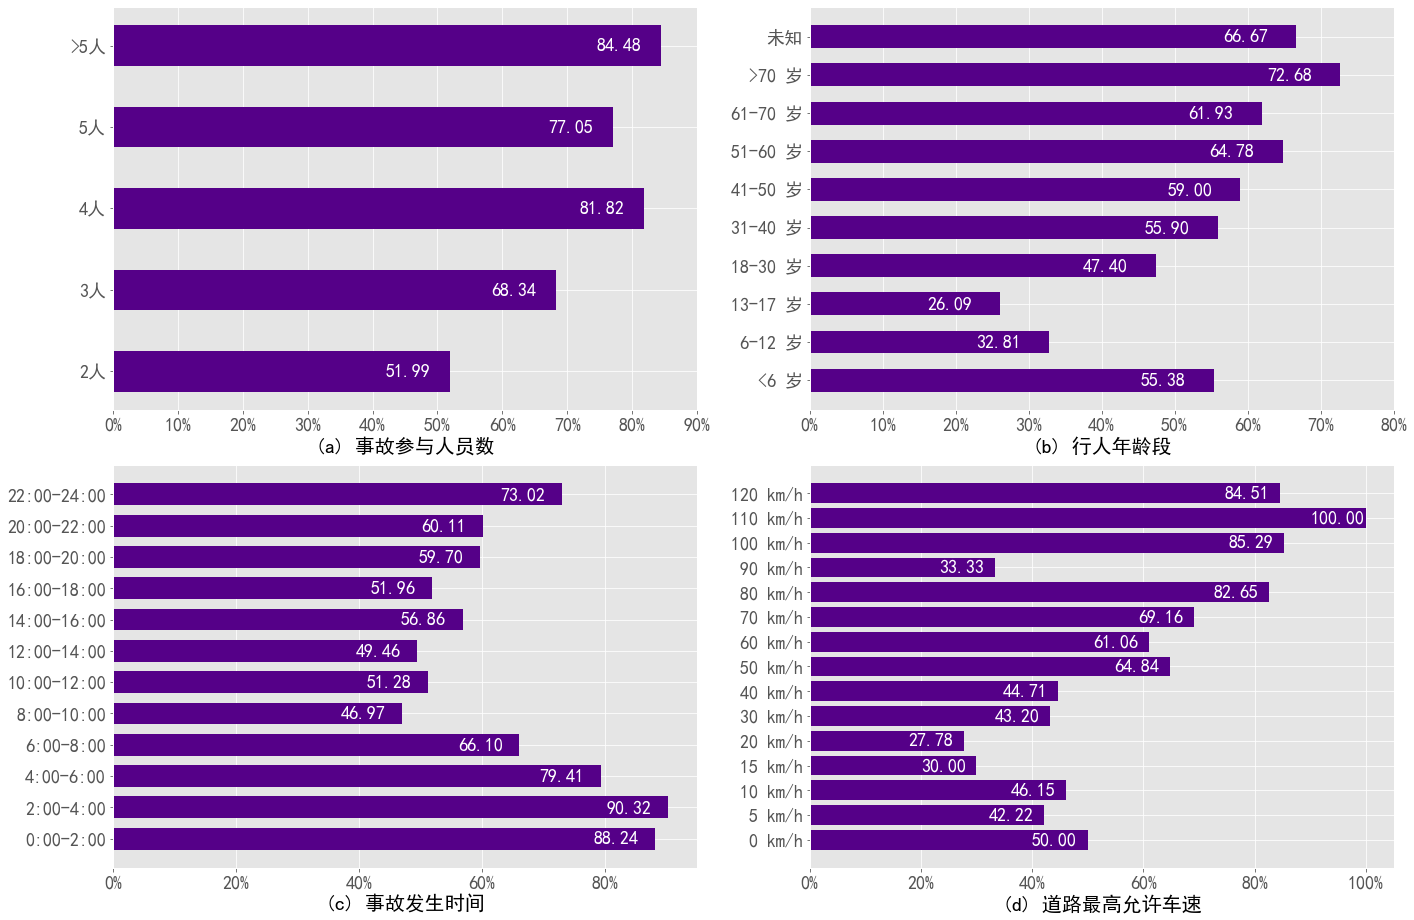

In [24]:
def to_percent1(temp, position):
    return '%1.f'%(1*temp) + '%'

fig, ax = plt.subplots(2,2,figsize = (20,13))

#事故参与人员数
ax[0][0].barh(d31["事故参与人员数"], d31["死亡或重伤占比"],height = 0.5, color='#550088') 
for a,b in zip(list(d31["事故参与人员数"]),list(d31["死亡或重伤占比"])):   
    ax[0][0].text(b-10, a,'%.2f'%b, ha = 'left',va = 'center',fontsize=18, color='#FFFFFF')

ax[0][0].set_title('(a) 事故参与人员数',fontsize=20, y=-0.12)
ax[0][0].tick_params(labelsize=18)
ax[0][0].set_xlim([0,90])
ax[0][0].xaxis.set_major_formatter(FuncFormatter(to_percent1))


#行人年龄段
ax[0][1].barh(d32["行人年龄段"], d32["死亡或重伤占比"],height = 0.6, color='#550088') 
for a,b in zip(list(d32["行人年龄段"]),list(d32["死亡或重伤占比"])):   
    ax[0][1].text(b-10, a,'%.2f'%b, ha = 'left',va = 'center',fontsize=18, color='#FFFFFF')

ax[0][1].set_title('(b) 行人年龄段',fontsize=20, y=-0.12)
ax[0][1].tick_params(labelsize=18)
ax[0][1].set_xlim([0,80])
ax[0][1].xaxis.set_major_formatter(FuncFormatter(to_percent1))



#事故发生时间
ax[1][0].barh(d33["事故发生时间"], d33["死亡或重伤占比"],height = 0.7, color='#550088') 
for a,b in zip(list(d33["事故发生时间"]),list(d33["死亡或重伤占比"])):   
    ax[1][0].text(b-10, a,'%.2f'%b, ha = 'left',va = 'center',fontsize=18, color='#FFFFFF')
    
ax[1][0].set_title('(c) 事故发生时间',fontsize=20, y=-0.12)
ax[1][0].tick_params(labelsize=18)
ax[1][0].set_xlim([0,95])
ax[1][0].xaxis.set_major_formatter(FuncFormatter(to_percent1))


#道路最高允许车速
ax[1][1].barh(d34["道路最高允许车速"], d34["死亡或重伤占比"],height = 0.8, color='#550088') 
for a,b in zip(list(d34["道路最高允许车速"]),list(d34["死亡或重伤占比"])):   
    ax[1][1].text(b-10, a,'%.2f'%b, ha = 'left',va = 'center',fontsize=18, color='#FFFFFF')
    
ax[1][1].set_title('(d) 道路最高允许车速',fontsize=20, y=-0.12)
ax[1][1].tick_params(labelsize=18)
ax[1][1].set_xlim([0,105])
ax[1][1].xaxis.set_major_formatter(FuncFormatter(to_percent1))

plt.tight_layout(pad=2)     #避免过于拥挤
plt.show()    

fig.savefig('各重要特征分析图.svg',format='svg',dpi=600, bbox_inches='tight')

<a name='4'></a>
# 4 特征的卡方检验

<a name='4-1'></a>
4.1 事故参与人员数

In [25]:
map = {'事故参与人员数':data["事故参与人员数"].value_counts().index,'次数':data["事故参与人员数"].value_counts().values}
df = pd.DataFrame(map)
df = df.sort_values(by=['事故参与人员数'],ascending=True)
c = data[["事故参与人员数", "行人事故后果"]].groupby(['事故参与人员数'], as_index=True).sum().sort_values(by='行人事故后果', ascending=False)
c = c.sort_values(by=['事故参与人员数'],ascending=True)
d4 = pd.merge(c, df,on = '事故参与人员数')
d41 = d4[:4]
d41.loc['5'] =  ['>5', d4[4:]["行人事故后果"].sum(), d4[4:]["次数"].sum()]
d41.rename(columns={'次数':'次数', '行人事故后果':'死亡或重伤人数' },inplace=True) 
mapping = {2:'2人', 3:'3人', 4:'4人', 5:'5人', ">5":'>5人', }
d41["事故参与人员数"].replace((mapping),inplace=True)
d41["无伤或轻伤人数"] = d41["次数"] - d41["死亡或重伤人数"]
d41

,事故参与人员数,死亡或重伤人数,次数,无伤或轻伤人数
0,2人,497,956,459
1,3人,177,259,82
2,4人,72,88,16
3,5人,47,61,14
5,>5人,49,58,9


In [26]:
observed = d41[['死亡或重伤人数','无伤或轻伤人数']]
p1 = stats.chi2_contingency(observed=observed)[1]
p1

1.0484605404256894e-14

<a name='4-2'></a>
4.2 行人年龄段

In [27]:
map = {'行人年龄段':data["行人年龄段"].value_counts().index,'次数':data["行人年龄段"].value_counts().values}
df = pd.DataFrame(map)
c = data[["行人年龄段", "行人事故后果"]].groupby(['行人年龄段'], as_index=True).sum().sort_values(by='行人事故后果', ascending=False)
d42 = pd.merge(c, df,on = '行人年龄段')

d42 = d42.sort_values(by=['行人年龄段'],ascending=True)
mapping = {1:'<6 岁', 2:'6-12 岁', 3:'13-17 岁', 4:'18-30 岁', 5:'31-40 岁', 6:'41-50 岁', 7:'51-60 岁', 
            8:'61-70 岁', 9:'>70 岁', 10:'未知'}
d42["行人年龄段"].replace((mapping),inplace=True)
d42.rename(columns={'次数':'次数', '行人事故后果':'死亡或重伤人数' },inplace=True) 
d42["无伤或轻伤人数"] = d42["次数"] - d42["死亡或重伤人数"]
d42

,行人年龄段,死亡或重伤人数,次数,无伤或轻伤人数
7,<6 岁,36,65,29
8,6-12 岁,21,64,43
9,13-17 岁,6,23,17
5,18-30 岁,73,154,81
4,31-40 岁,90,161,71
2,41-50 岁,141,239,98
0,51-60 岁,149,230,81
3,61-70 岁,135,218,83
1,>70 岁,149,205,56
6,未知,42,63,21


In [28]:
observed = d42[['死亡或重伤人数','无伤或轻伤人数']]
p2 = stats.chi2_contingency(observed=observed)[1]
p2

1.7386856329311096e-09

<a name='4-3'></a>
4.3 事故发生时间

In [29]:
map = {'事故发生时间':data["事故发生时间"].value_counts().index,'次数':data["事故发生时间"].value_counts().values}
df = pd.DataFrame(map)
c = data[["事故发生时间", "行人事故后果"]].groupby(['事故发生时间'], as_index=True).sum().sort_values(by='行人事故后果', ascending=False)
d43 = pd.merge(c, df,on = '事故发生时间')

d43 = d43.sort_values(by=['事故发生时间'],ascending=True)
mapping = {1:'0:00-2:00', 2:'2:00-4:00', 3:'4:00-6:00', 4:'6:00-8:00', 5:'8:00-10:00', 
           6:'10:00-12:00', 7:'12:00-14:00', 8:'14:00-16:00', 9:'16:00-18:00', 10:'18:00-20:00',
           11:'20:00-22:00', 12:'22:00-24:00'}
d43["事故发生时间"].replace((mapping),inplace=True)
d43.rename(columns={'次数':'次数', '行人事故后果':'死亡或重伤人数' },inplace=True) 
d43["无伤或轻伤人数"] = d43["次数"] - d43["死亡或重伤人数"]
d43

,事故发生时间,死亡或重伤人数,次数,无伤或轻伤人数
10,0:00-2:00,30,34,4
11,2:00-4:00,28,31,3
7,4:00-6:00,54,68,14
4,6:00-8:00,78,118,40
5,8:00-10:00,62,132,70
3,10:00-12:00,80,156,76
8,12:00-14:00,46,93,47
6,14:00-16:00,58,102,44
2,16:00-18:00,93,179,86
0,18:00-20:00,157,263,106


In [30]:
observed = d43[['死亡或重伤人数','无伤或轻伤人数']]
p3 = stats.chi2_contingency(observed=observed)[1]
p3

2.3497619788582973e-09

<a name='4-4'></a>
4.4 道路最高允许车速

In [31]:
map = {'道路最高允许车速':data["道路最高允许车速"].value_counts().index,'次数':data["道路最高允许车速"].value_counts().values}
df = pd.DataFrame(map)
c = data[["道路最高允许车速", "行人事故后果"]].groupby(['道路最高允许车速'], as_index=True).sum().sort_values(by='行人事故后果', ascending=False)
d44 = pd.merge(c, df,on = '道路最高允许车速')

d44 = d44.sort_values(by=['道路最高允许车速'],ascending=True)
mapping = {  1:'0 km/h', 2:'5 km/h', 3:'10 km/h', 4:'15 km/h', 5:'20 km/h', 6:'30 km/h',
           7:'40 km/h', 8:'50 km/h', 9:'60 km/h', 10:'70 km/h', 11:'80 km/h', 12:'90 km/h',
           13:'100 km/h', 14:'110 km/h', 15:'120 km/h' }
d44["道路最高允许车速"].replace((mapping),inplace=True)
d44.rename(columns={'次数':'次数', '行人事故后果':'死亡或重伤人数' },inplace=True) 
d44["无伤或轻伤人数"] = d44["次数"] - d44["死亡或重伤人数"]
d44

,道路最高允许车速,死亡或重伤人数,次数,无伤或轻伤人数
9,0 km/h,15,30,15
8,5 km/h,19,45,26
11,10 km/h,6,13,7
13,15 km/h,3,10,7
10,20 km/h,10,36,26
6,30 km/h,54,125,71
1,40 km/h,93,208,115
5,50 km/h,59,91,32
0,60 km/h,334,547,213
3,70 km/h,74,107,33


In [32]:
observed = d44[['死亡或重伤人数','无伤或轻伤人数']]
p4 = stats.chi2_contingency(observed=observed)[1]
p4

1.8462312944252034e-18